In [1]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, cache=True)
mnist.target = mnist.target.astype(np.int8) #fetch_openml() returns targets as strings
mnist['data'],mnist['target']

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5, 0, 4, ..., 4, 5, 6], dtype=int8))

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
X,y = mnist['data'],mnist['target']
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
28*28

784

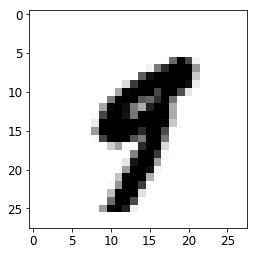

In [7]:
random_digit = X[36000] #This will be an array of 1's and 0's
random_digit_image = random_digit.reshape(28,28)
plt.imshow(random_digit_image, cmap=mpl.cm.binary, interpolation = 'nearest')

In [8]:
y[36000]

9

In [9]:
#Helper function to plot digits
def plot_digits(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap=mpl.cm.binary, interpolation='nearest')

In [10]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [11]:
X_train.shape

(60000, 784)

### Training a Binary Classifier to predict whether an image is a 9 or not

In [12]:
y_train_9 = (y_train == 9)
t_test_9 = (y_test == 9)

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5,tol=-np.infty)
sgd_clf.fit(X_train,y_train_9)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
sgd_clf.predict([random_digit])

array([False])

In [19]:
y_train[36000]

9

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_9,cv = 3,scoring='accuracy')

array([0.93975, 0.94845, 0.94275])

In [21]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_9,cv=3)

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_9,y_train_pred)

array([[53151,   900],
       [ 2447,  3502]], dtype=int64)

In [23]:
from sklearn.metrics import precision_score,recall_score,f1_score

precision_score(y_train_9,y_train_pred)

0.7955474784189005

In [24]:
recall_score(y_train_9,y_train_pred)

0.5886703647671878

In [25]:
f1_score(y_train_9,y_train_pred)

0.6766495990725534

### Precision Recall Curve

In [26]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_9,y_train_pred)

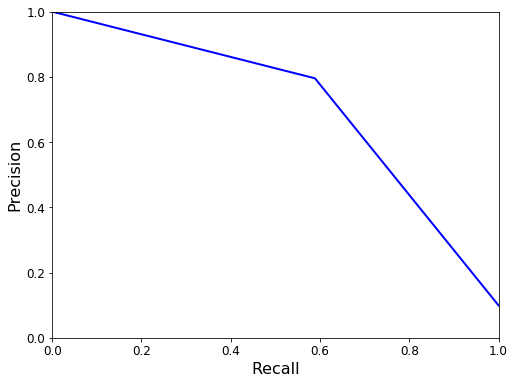

In [27]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### ROC Curve

In [28]:
from sklearn.metrics import roc_curve

fpr,tpr, thresholds = roc_curve(y_train_9,y_train_pred)

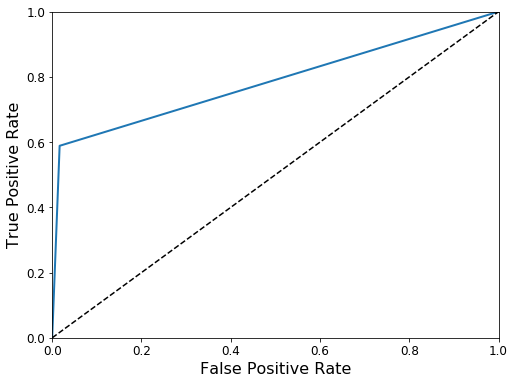

In [29]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()    

In [30]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_9, y_train_pred)

0.7860097119945169

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10)
forest_clf.fit(X_train,y_train_9)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
cross_val_score(forest_clf,X_train,y_train_9,cv=3,scoring='accuracy')

array([0.97725, 0.97725, 0.9774 ])

In [33]:
y_preds_forest = cross_val_predict(forest_clf,X_train,y_train_9,cv=3)

In [34]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_9,y_preds_forest)

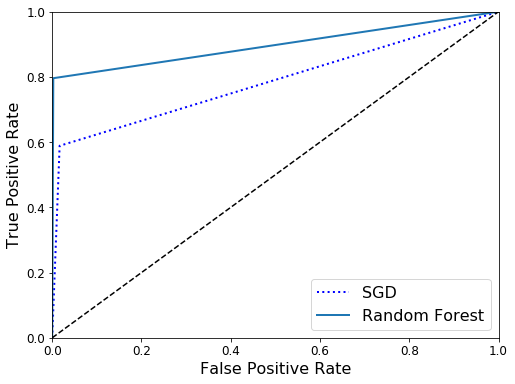

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [36]:
roc_auc_score(y_train_9,y_preds_forest)

0.8967449757229993

In [37]:
precision_score(y_train_9,y_preds_forest)

0.9728785699609616

In [38]:
recall_score(y_train_9,y_preds_forest)

0.7959320894267944

### Multiclass Classification

In [39]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
sgd_clf.predict([X_train[35999]])

array([0], dtype=int8)

In [41]:
y_train[35999]

0

Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are
capable of handling multiple classes directly. Others (such as Support Vector Machine
classifiers or Linear classifiers) are strictly binary classifiers. However, there are various
strategies that you can use to perform multiclass classification using multiple
binary classifiers.<br>
<br>
For example, one way to create a system that can classify the digit images into 10
classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a
1-detector, a 2-detector, and so on). Then when you want to classify an image, you get
the decision score from each classifier for that image and you select the class whose
classifier outputs the highest score. This is called the one-versus-all (OvA) strategy
(also called one-versus-the-rest).<br>
<br>
Another strategy is to train a binary classifier for every pair of digits: one to distinguish
0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.
This is called the one-versus-one (OvO) strategy. If there are N classes, you need to
train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45
binary classifiers! When you want to classify an image, you have to run the image
through all 45 classifiers and see which class wins the most duels. The main advantage
of OvO is that each classifier only needs to be trained on the part of the training
set for the two classes that it must distinguish.<br>
<br>
Some algorithms (such as Support Vector Machine classifiers) scale poorly with the
size of the training set, so for these algorithms OvO is preferred since it is faster to
train many classifiers on small training sets than training few classifiers on large
training sets. For most binary classification algorithms, however, OvA is preferred.
Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass
classification task, and it automatically runs OvA (except for SVM classifiers for
which it uses OvO). Let’s try this with the SGDClassifier:<br>

In [42]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([random_digit])

array([9], dtype=int8)

In [43]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.83733253, 0.87219361, 0.87508126])

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64)) 

In [45]:
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.90591882, 0.90769538, 0.91293694])

In [46]:
y_preds_sgd = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)

In [47]:
conf_matrix = confusion_matrix(y_train,y_preds_sgd)
conf_matrix

array([[5723,    2,   22,   10,   10,   46,   55,    9,   43,    3],
       [   1, 6463,   43,   30,    6,   42,    9,   11,  122,   15],
       [  55,   33, 5316,  116,   78,   32,   94,   53,  165,   16],
       [  48,   37,  134, 5340,    4,  225,   40,   56,  139,  108],
       [  21,   23,   35,    8, 5334,   10,   55,   30,   87,  239],
       [  75,   37,   35,  199,   74, 4582,  108,   26,  190,   95],
       [  32,   22,   39,    2,   35,   87, 5655,    3,   43,    0],
       [  27,   22,   69,   30,   62,   10,    4, 5751,   15,  275],
       [  53,  153,   71,  166,   15,  152,   53,   20, 5016,  152],
       [  43,   29,   27,   88,  147,   26,    3,  174,   77, 5335]],
      dtype=int64)

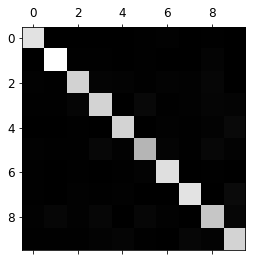

In [48]:
plt.matshow(conf_matrix,cmap=plt.cm.gray)

### Multilabel Classification

In [49]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]

In [50]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
knn_clf.predict([random_digit])

array([[ True,  True]])

In [52]:
knn_clf.predict([X_train_scaled[35999]])

array([[False, False]])

In [ ]:
#CAUTION: MAY TAKE HOURS TO RUN
y_train_knn_predict = cross_val_predict(knn_clf,X_train_scaled,y_multilabel,cv=3)

### Multioutput Classification : Removing Noise from Images

In [53]:
#Adding Noise to Images
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

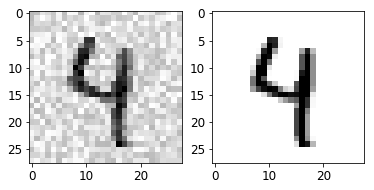

In [54]:
some_index = 5200
plt.subplot(121); plot_digits(X_test_mod[some_index])
plt.subplot(122); plot_digits(y_test_mod[some_index])
plt.show()

In [55]:
knn_clf.fit(X_train_mod,y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
clean_image = knn_clf.predict([X_test_mod[some_index]])

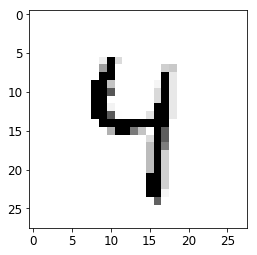

In [57]:
plot_digits(clean_image)

### Using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights':['uniform','distance'], 'n_neighbors':[3,4,5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
from sklearn.metrics import accuracy_core

y_pred = grid_search.predict(X_test)
accuracy_score(y_test,y_pred)